<a href="https://colab.research.google.com/github/ikiakmal15/TI11_RIFQ_0110224225/blob/main/praktikum03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRAKTIKUM ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/praktikum 03"

In [ ]:
import pandas as pd

df = pd.read_csv(path + '/data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [ ]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
     .rename(columns={
         "Height(Inches)" : "tinggi_cm" ,
         "Weight(Pounds)" : "berat_kg"
         })
     .assign(
         tinggi_cm = lambda df: df["tinggi_cm"] * 2.54,
         berat_kg = lambda df: df["berat_kg"] * 0.453592
     )
     .round({"tinggi_cm": 1, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.1,51.25
1,181.6,61.91
2,176.3,69.41
3,173.3,64.56
4,172.2,65.45


In [ ]:
from sklearn.model_selection import train_test_split

x = df1[["tinggi_cm"]]
y = df1[["berat_kg"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("koefisien (kg per cm):", model.coef_[0])
print("intersep (kg):        ", model.intercept_)
print("R^2:                   ", r2)
print("MAE:                   ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):             ", rmse)

koefisien (kg per cm): [0.55176235]
intersep (kg):         [-37.64650621]
R^2:                    0.24986119019424247
MAE:                    3.6702947871150142
RMSE (kg):              4.609101772508528


In [ ]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y = {slope:.3f} * x + ({intercept:.3f})")

Persamaan: y = 0.552 * x + (-37.647)


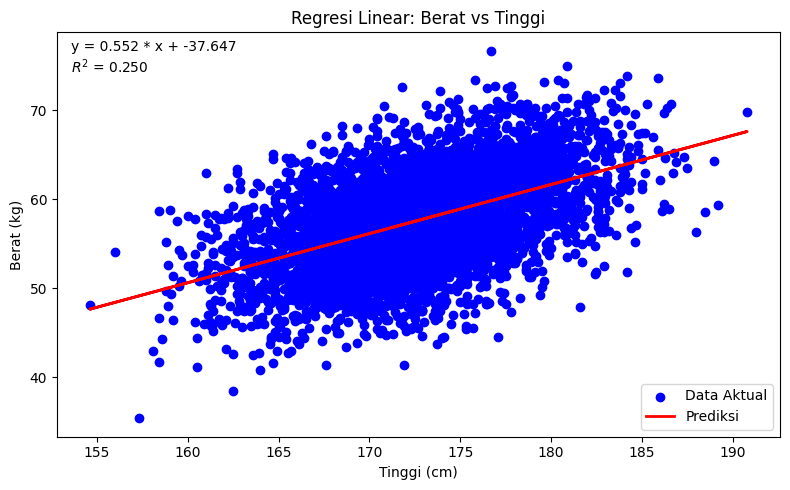

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color="blue", label="Data Aktual")
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca() .transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

DATA TESTING dari Mahasiswa TI 2022

In [ ]:
path + "/content/drive/MyDrive/praktikum 03/data/berat_ti2022 - Sheet1.csv"

'/content/drive/MyDrive/praktikum 03/content/drive/MyDrive/praktikum 03/data/berat_ti2022 - Sheet1.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(path + '/data/berat_ti2022 - Sheet1.csv')
df.head()

,No.,Nama,tinggi_cm,actual_berat
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


In [ ]:
x_testing = df["tinggi_cm"]
x_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [ ]:
y_pred_test = model.predict(x_test)

hasil = pd.DataFrame({
    "Tinggi (cm)": x_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy().flatten(),
    "Berat Prediksi (kg)": y_pred_test.flatten(),
})

hasil["selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

denom = hasil["Berat aktual (kg)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),selisih error (kg),Akurasi (%)
0,174.7,50.16,58.746376,8.586376,82.882026
1,171.3,50.33,56.870384,6.540384,87.005000
2,169.3,58.22,55.766859,-2.453141,95.786429
3,163.3,58.92,52.456285,-6.463715,89.029675
4,170.5,63.06,56.428974,-6.631026,89.484576
...,...,...,...,...,...
4995,178.7,56.59,60.953425,4.363425,92.289406
4996,163.1,47.45,52.345932,4.895932,89.681913
4997,166.5,52.46,54.221924,1.761924,96.641395
4998,167.7,49.90,54.884039,4.984039,90.011946


In [ ]:
data = pd.read_csv(path + '/data/berat_ti2022 - Sheet1.csv')

y_pred = model.predict(data[["tinggi_cm"]])
data['prediksi_kg']=y_pred
data['selisih error (kg)'] = data["prediksi_kg"] - data["actual_berat"]
denom = data["actual_berat"].replace(0, np.nan)
data["akurasi (%)"] = (1 - (data["selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data

,No.,Nama,tinggi_cm,actual_berat,prediksi_kg,selisih error (kg),akurasi (%)
0,1,Rafa,168,58.5,55.049568,-3.450432,94.101825
1,2,Tiara,162,78.2,51.738994,-26.461006,66.162396
2,3,Tia,155,52.7,47.876657,-4.823343,90.847547
3,4,Keyla,160,70.3,50.635469,-19.664531,72.027694
4,5,Bani,183,65.8,63.326003,-2.473997,96.240126


PRAKTIKUM ASDOS

In [ ]:
import pandas as pd

df = pd.read_csv(path + '/data/stunting_wasting_dataset.csv', sep=',')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [ ]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"JK", "Umur (bulan)":"umur_bln",
                        "Tinggi Badan (cm)":"tinggi_cm", "Berat Badan (kg)":"berat_kg"})).copy()
df1["JK"] = df1["JK"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,JK,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [ ]:
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        JK  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
JK         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


HEATMAP GRAFIK

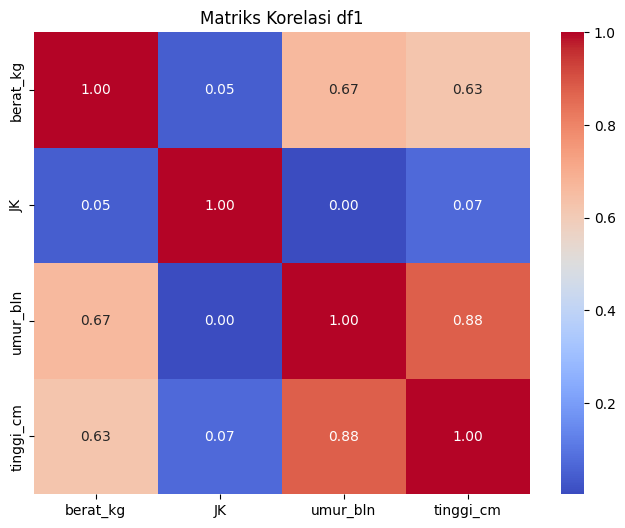

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state supaya hasil konsisten
)

## Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

## cek apakah sudah ada constanta pada data training
X_train.head()


Jumlah data train : 80000
Jumlah data test  : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [ ]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('---------------------------')
print(model.params)
print('---------------------------')
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']
#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")


---------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
---------------------------
y = 2.546 + 0.230*x1 + 0.054*x2


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        03:30:39   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [ ]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi zero
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


TUGAS ML 03

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/praktikum 03/data/day.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Library Statistik
import statsmodels.api as sm

In [5]:
#baca dataset
df = pd.read_csv(path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


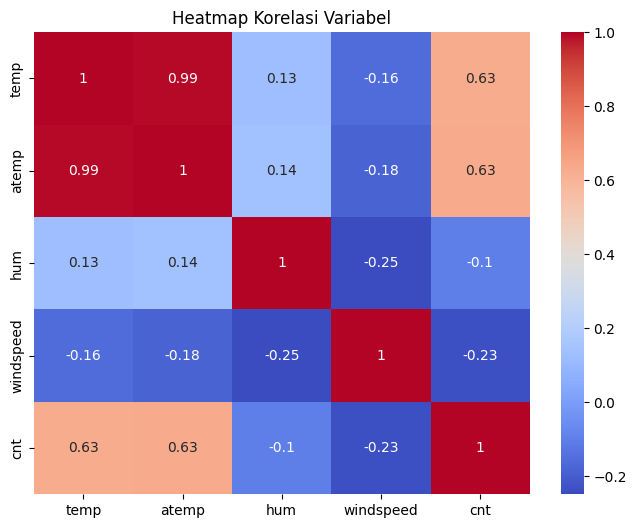

In [9]:
#analiis korelasi

# Melihat korelasi antar variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel')
plt.show()

In [12]:
#menentukan variable
# Variabel dependen (target)
y = df['cnt']

# Variabel independen (fitur)
X = df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'weathersit']]

# Melihat sebagian data
X.head(), y.head()

(       temp     atemp       hum  windspeed  season  weathersit
 0  0.344167  0.363625  0.805833   0.160446       1           2
 1  0.363478  0.353739  0.696087   0.248539       1           2
 2  0.196364  0.189405  0.437273   0.248309       1           1
 3  0.200000  0.212122  0.590435   0.160296       1           1
 4  0.226957  0.229270  0.436957   0.186900       1           1,
 0     985
 1     801
 2    1349
 3    1562
 4    1600
 Name: cnt, dtype: int64)

In [13]:
#bagi data menjadi training 80% dan testing 20%

from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test :", X_test.shape[0])

Jumlah data train: 584
Jumlah data test : 147


In [14]:
#buat model

from sklearn.linear_model import LinearRegression

# Membuat objek model regresi linear
model = LinearRegression()

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Menampilkan hasil parameter model
print("Intercept (β₀):", model.intercept_)
print("Koefisien (β):", model.coef_)

Intercept (β₀): 3170.3897666737316
Koefisien (β): [ 2760.64635141  3209.29692308 -2279.72730891 -2544.4632139
   418.31628097  -461.83380323]


In [15]:
#evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Melakukan prediksi terhadap data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model ===")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

=== Evaluasi Model ===
Mean Absolute Error (MAE): 1150.0162404537502
Mean Squared Error (MSE): 1835143.8639559024
R2 Score: 0.5423447044366508


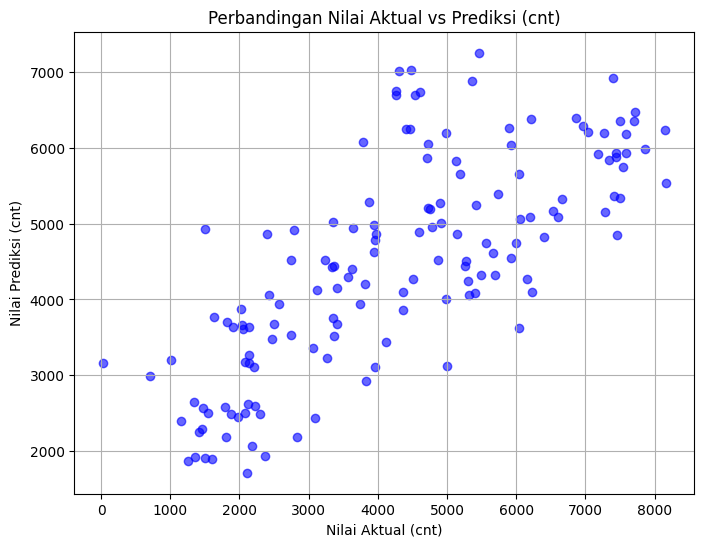

In [17]:
#visualisasi hasil

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('Nilai Aktual (cnt)')
plt.ylabel('Nilai Prediksi (cnt)')
plt.title('Perbandingan Nilai Aktual vs Prediksi (cnt)')
plt.grid(True)
plt.show()

In [18]:
#anallisis statistik

import statsmodels.api as sm

# Menambahkan kolom konstanta (β₀)
X_train_ols = sm.add_constant(X_train)

# Membuat model OLS
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Menampilkan hasil summary
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           5.61e-86
Time:                        14:55:54   Log-Likelihood:                -5034.0
No. Observations:                 584   AIC:                         1.008e+04
Df Residuals:                     577   BIC:                         1.011e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3170.3898    384.175      8.252      0.000    2415.838    3924.942
temp        2760.6464   2253.265      1.225      0.221   -1664.955    7186.248
atemp       3209.2969   2550.279      1.258      0.209   -1799.664    8218.258
hum        -2279.7273    531.733     -4.287      0.000   -3324.096   -1235.359
windspeed  -2544.4632    790.291     -3.220      0.001   -4096.662    -992.265
season       418.3163     55.314      7.563      0.000     309.675     526.958
weathersit  -461.8338    132.731     -3.479      0.001    -722.529    -201.139
==============================================================================
Omnibus:                       10.531   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.003
Skew:                           0.121   Prob(JB):                       0.0302
Kurtosis:                       2.522   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""